In [12]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(style="ticks", color_codes=True)

In [2]:
# remove identifying features such as "ctas_official_version"
folders = ["../data/sessions-active_30-by_device/",
           "../data/sessions-active_30-canada/",
           "../data/units-active_devices-by_device/",
           "../data/units-active_devices-canada/"]

# os.getcwd()
# os.listdir("../data/sessions-active_30-by_device/")[0:5]
# for folder in folders:
#     for file in os.listdir(folder):
#         new_name = file.replace("ctas_official_version-", "")
#         os.rename(folder + file, folder + new_name)

# navigate to directory and combine all csv files
data = []
for folder in folders:
    info = pd.DataFrame()
    for file in os.listdir(folder):
        input_data = pd.read_csv(folder + file, skiprows=4)
        info = pd.concat([info, input_data], ignore_index=True)

    data.append(info)

# write combined tables to file
# data[0].to_csv("../sessions-active_30-by_device.csv", index=False)
# data[1].to_csv("../sessions-active_30-canada.csv", index=False)
# data[2].to_csv("../units-active_devices-by_device.csv", index=False)
# data[3].to_csv("../units-active_devices-canada.csv", index=False)

# combine datasets
# active_sessions = pd.merge(data[0], data[1], on="Date")
# units = pd.merge(data[2], data[3], on="Date")

# active_sessions.to_csv("../active_sessions.csv", index=False)
# units.to_csv("../units.csv", index=False)

In [3]:
data[3].head()
data[3].shape

(1491, 311)

In [4]:
# add the 'app units' and 'active devices' from data[2] and data[3]
dataset = pd.DataFrame()
dataset = pd.concat([data[2], data[3]['Canada App Units']], axis=1)
# sum all countries then minus Canada = world total
dataset['World App Units'] = data[3].filter(like='App Units').sum(axis=1).subtract(data[3]['Canada App Units'])
dataset = pd.concat([dataset, data[3]['Canada Active Devices']], axis=1)
dataset['World Active Devices'] = data[3].filter(like='Active Devices').sum(axis=1).subtract(data[3]['Canada Active Devices'])
dataset.head()

,Date,Apple TV App Units,iPad App Units,iPhone App Units,iPod App Units,Apple TV Active Devices,iPad Active Devices,iPhone Active Devices,iPod Active Devices,Canada App Units,World App Units,Canada Active Devices,World Active Devices
0,4/1/15,-,1.0,3.0,0.0,-,1.0,11.0,0.0,4.0,0.0,10.0,2.0
1,4/2/15,-,0.0,0.0,0.0,-,2.0,9.0,0.0,0.0,0.0,10.0,1.0
2,4/3/15,-,0.0,3.0,0.0,-,0.0,10.0,0.0,3.0,0.0,6.0,3.0
3,4/4/15,-,0.0,3.0,0.0,-,1.0,5.0,0.0,3.0,0.0,6.0,0.0
4,4/5/15,-,0.0,2.0,0.0,-,0.0,9.0,0.0,1.0,1.0,9.0,0.0


In [5]:
# add the 'sessions' and 'active last 30 days' from data[0] and data[1]
dataset = pd.concat([dataset, data[0].loc[:,data[0].columns!='Date'], data[1]['Canada Sessions'], data[1]['Canada Active Last 30 Days']], axis=1)

# sum all countries then minus Canada = world total
dataset['World Sessions'] = data[1].filter(like='Sessions').sum(axis=1).subtract(data[1]['Canada Sessions'])
dataset['World Active Last 30 Days'] = data[1].filter(like='Active Last 30 Days').sum(axis=1).subtract(data[1]['Canada Active Last 30 Days'])

dataset.index = pd.to_datetime(dataset['Date'], format='%m/%d/%y')
dataset.drop(columns='Date', inplace=True)

dataset.replace('-', 0, inplace=True)

# export df
dataset.to_csv("../dataset.csv", index=False)
dataset.head()

,Apple TV App Units,iPad App Units,iPhone App Units,iPod App Units,Apple TV Active Devices,iPad Active Devices,iPhone Active Devices,iPod Active Devices,Canada App Units,World App Units,...,iPhone Sessions,iPod Sessions,Apple TV Active Last 30 Days,iPad Active Last 30 Days,iPhone Active Last 30 Days,iPod Active Last 30 Days,Canada Sessions,Canada Active Last 30 Days,World Sessions,World Active Last 30 Days
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,0,1.0,3.0,0.0,0,1.0,11.0,0.0,4.0,0.0,...,27.0,0.0,0,1.0,11.0,0.0,25.0,10.0,6.0,2.0
2015-04-02,0,0.0,0.0,0.0,0,2.0,9.0,0.0,0.0,0.0,...,28.0,0.0,0,2.0,18.0,0.0,30.0,17.0,1.0,3.0
2015-04-03,0,0.0,3.0,0.0,0,0.0,10.0,0.0,3.0,0.0,...,29.0,0.0,0,2.0,21.0,0.0,17.0,18.0,9.0,4.0
2015-04-04,0,0.0,3.0,0.0,0,1.0,5.0,0.0,3.0,0.0,...,6.0,0.0,0,3.0,26.0,0.0,7.0,24.0,0.0,4.0
2015-04-05,0,0.0,2.0,0.0,0,0.0,9.0,0.0,1.0,1.0,...,28.0,0.0,0,3.0,31.0,0.0,28.0,29.0,0.0,4.0


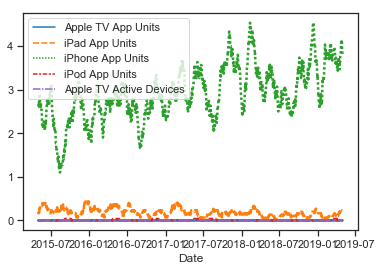

In [13]:
# plot values
# data2 = data.rolling(7).mean()
data2 = dataset.rolling(30).mean()
sns.lineplot(data=data2.iloc[:,0:5], palette="tab10", linewidth=2.5)

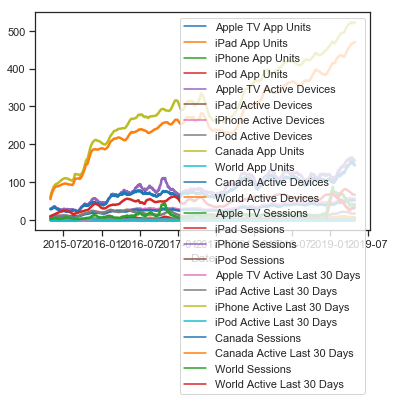

In [7]:
sns.lineplot(data=data2, palette="tab10", linewidth=2.5, dashes=False)

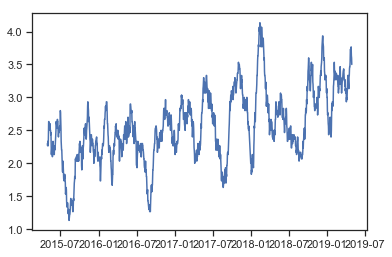

In [8]:
sns.lineplot(data=dataset['Canada App Units'].rolling(30).mean())

In [16]:
# yoy = dataset.groupby(dataset.index.dt.year).transform('mean')
yoy = dataset.copy()
yoy.loc['2016'].mean()
yoy.resample('A').sum().round(2)

,Apple TV App Units,iPad App Units,iPhone App Units,iPod App Units,Apple TV Active Devices,iPad Active Devices,iPhone Active Devices,iPod Active Devices,Canada App Units,World App Units,...,iPhone Sessions,iPod Sessions,Apple TV Active Last 30 Days,iPad Active Last 30 Days,iPhone Active Last 30 Days,iPod Active Last 30 Days,Canada Sessions,Canada Active Last 30 Days,World Sessions,World Active Last 30 Days
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0,66.0,626.0,1.0,0,238.0,3872.0,14.0,584.0,101.0,...,9795.0,21.0,0,3724.0,36827.0,219.0,8770.0,33459.0,1452.0,6584.0
2016-12-31,0,75.0,956.0,2.0,0,696.0,10123.0,13.0,845.0,173.0,...,28437.0,28.0,0,7179.0,97761.0,208.0,24658.0,85373.0,5067.0,18007.0
2017-12-31,0,69.0,1136.0,2.0,0,245.0,11129.0,7.0,962.0,229.0,...,32266.0,15.0,0,4493.0,110011.0,193.0,28601.0,95257.0,4404.0,17563.0
2018-12-31,0,52.0,1189.0,0.0,0,376.0,15890.0,0.0,1056.0,180.0,...,42619.0,0.0,0,4297.0,151610.0,0.0,38182.0,131928.0,6392.0,22349.0
2019-12-31,0,15.0,438.0,1.0,0,458.0,6378.0,0.0,385.0,64.0,...,17167.0,0.0,0,2248.0,60162.0,0.0,15568.0,53395.0,6699.0,8492.0


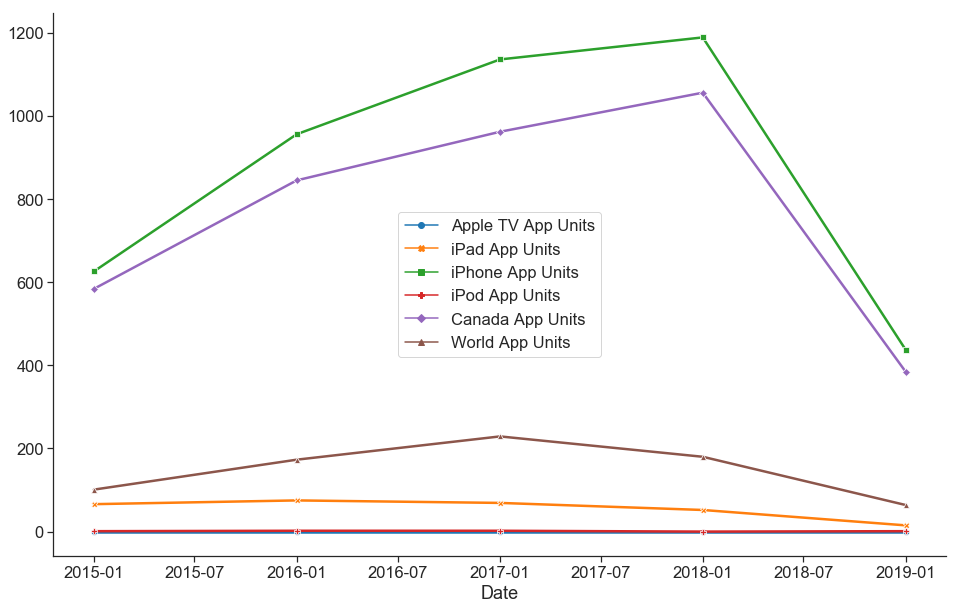

In [30]:
plt.figure(figsize=(16,10))
sns.set_context(font_scale=1.5)   
appunits = sns.lineplot(data=yoy.resample('AS').sum().round(2).filter(like="App Units"),
             palette="tab10",
             linewidth=2.5,
             markers=True,
             dashes=False)

sns.despine()

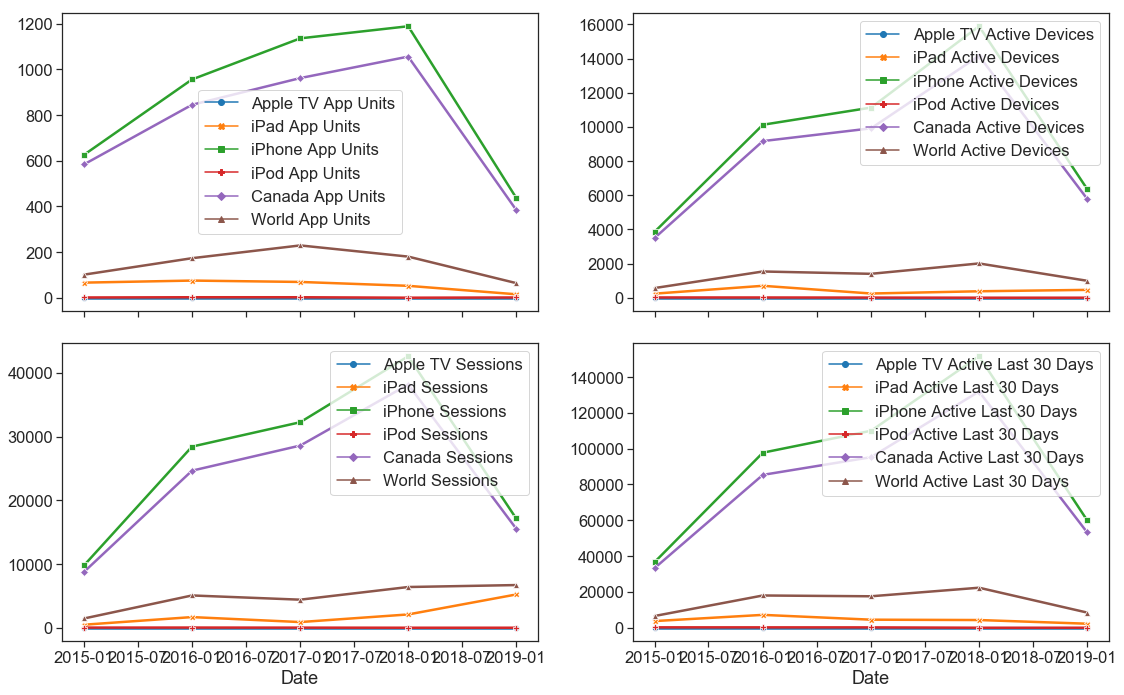

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(16,10))

sns.lineplot(data=yoy.resample('AS').sum().round(2).filter(like="App Units"),
             palette="tab10",
             linewidth=2.5,
             markers=True,
             ax=axes[0][0],
             dashes=False)
sns.lineplot(data=yoy.resample('AS').sum().round(2).filter(like="Active Devices"),
             palette="tab10",
             linewidth=2.5,
             markers=True,
             ax=axes[0][1],
             dashes=False)
sns.lineplot(data=yoy.resample('AS').sum().round(2).filter(like="Sessions"),
             palette="tab10",
             linewidth=2.5,
             markers=True,
             ax=axes[1][0],
             dashes=False)
sns.lineplot(data=yoy.resample('AS').sum().round(2).filter(like="Active Last 30 Days"),
             palette="tab10",
             linewidth=2.5,
             markers=True,
             ax=axes[1][1],
             dashes=False)
fig.tight_layout()